In [1]:
from packages_alphabet_detect.noisyfunctions import *
from collections import Counter

#alphabets, where each index from 0 to 25, for example alphabet[0]=a,...etc
alphabet=list(map(chr, range(97, 123)))

In [2]:
#get all images, where each image is saved as: [pixels dimensions, alphabet letter index, image name]
# note I save the image name to be able to identify the 
training,testing=get_images(alphabet,path='Noise ')

In [3]:
timea=time.time()
alldistances_sorted=getDistancesMatrixSorted(training)
print("time for getting the sorted matrix ",time.time()-timea," sec.")
allindicies=getAllIndicies(training,alphabet)



6  sec.
time for getting the sorted matrix  6.259654998779297  sec.


In [4]:
time1=time.time()

# this is an array that will save the error per k value, for eg the error of k=1 is all_kerrors[0]
all_kerrors=[]

#loop for every value of k of nearest neighbors from 1 to 100
for k in range(1,101):
    # an array that will have the error of each cross validation cycle, so after 10 times it will have something like: [2,3,4,5,2,3,2,4,5,6], so at the end we will average them to assign an error value corresponding to this k, and append it in all_kerrors above
    k_cv_errorlist=[]
    #cross validation is done 10 times and we take the average of them for each value of k in the bigger loop
    for x in range(10):
        #split the training data to 80% fit and 20% validation for each letter and randomely
        train80,train20=splitrandomlist(0.8,allindicies)
        #return the nearest k neighbors' alphabet 
        nearestKPoints=getKresultslist(k,train20,alldistances_sorted)

        #check if the majority of the neighbors is not like the alphabet they are supposed to be
    k_cv_errorlist.append(len(getErrorList(nearestKPoints,alldistances_sorted)))
    k_cv_error_avg=sum(k_cv_errorlist)/len(k_cv_errorlist)
    all_kerrors.append(k_cv_error_avg)

In [5]:

#all_kerrors
print("time for 100 k with 10 cross validations ",time.time()-time1," sec.")



time for 100 k with 10 cross validations  1.2662386894226074  sec.


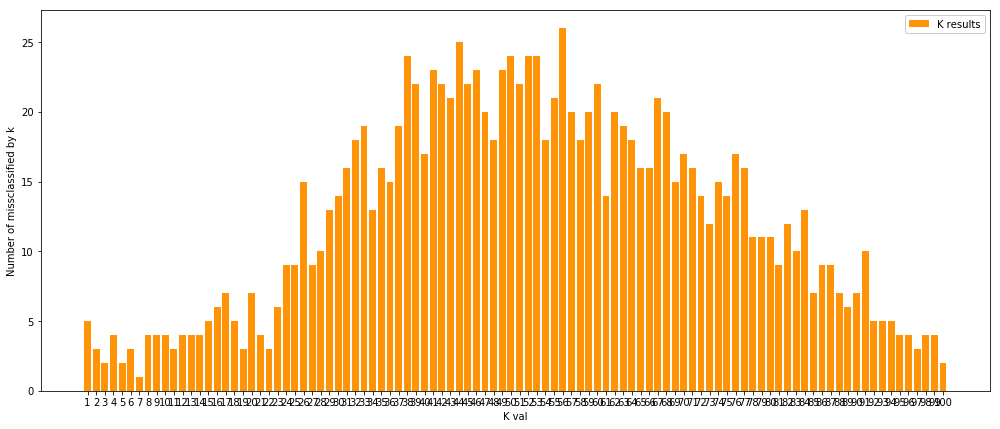

In [6]:
plt.figure(figsize=[17,7])
plt.bar(range(len(all_kerrors)),np.array(all_kerrors),color='#ff9408',label="K results")
#plt.bar(range(len(final_results)),np.array(final_results).T[0].T,color='#047495',label='Correct Prediction Count')
plt.xlabel('K val')
plt.ylabel('Number of missclassified by k',)
plt.legend(framealpha=1)
plt.label=""
plt.xticks(range(len(all_kerrors)),range(1,101))
#plt.yticks(range(3))
plt.show()
#plt.savefig('KNN.jpg')

In [7]:
lowestk=101
lowestk_index=-1
for kindex,kval in enumerate(all_kerrors):
    if kval<lowestk:
        lowestk=kval
        lowestk_index=kindex+1
print("Best K: ", lowestk_index,"and value ",lowestk) 

k=lowestk_index


Best K:  7 and value  1.0


### Part 2: classification

In [8]:
#this is the array that will save the # of correctly identified test points
correctclass=np.zeros(len(alphabet))
for i,testelem in enumerate(testing):
    templist=calculatenearestk(k,testelem[0],training)

    if testelem[1]==(getMajority(templist)):
        correctclass[testelem[1]]+=1


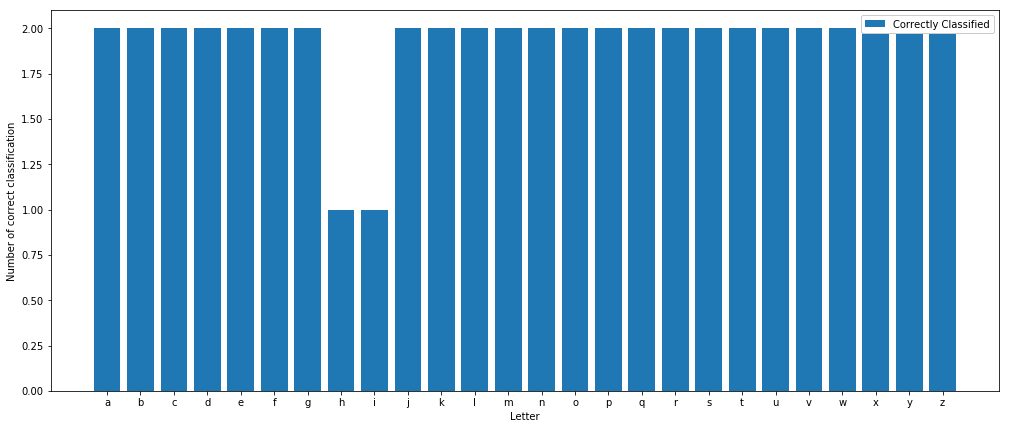

In [9]:

plt.figure(figsize=[17,7])
plt.bar(range(len(correctclass)),np.array(correctclass),label="Correctly Classified")
#plt.bar(range(len(final_results)),np.array(final_results).T[0].T,color='#047495',label='Correct Prediction Count')
plt.xlabel('Letter')
plt.ylabel('Number of correct classification',)
plt.legend(framealpha=1)
plt.label=""
plt.xticks(range(len(correctclass)),alphabet)
#plt.yticks(range(3))
plt.show()
#plt.savefig('Accuracy.jpg')